In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from KNN import *
from collections import Counter

In [2]:
#True negative = 0
#True positive = 1
#False negative = 2
#False positive = 3


def checker(example, output):
    #was prediction correct
    if example[-1]==output:
        #true positive
        if output==1.0:
            return 1
        #true negative
        else:
            return 0
    #false positive    
    elif output==1.0:            
        return 3
    #false negative
    else:
        return 2
            

In [25]:
predictions_rus = np.load('predictions_rus.npy')
predictions_ros = np.load('predictions_ros.npy')
predictions_smote = np.load('predictions_smote.npy')
predictions_none = np.load('predictions_none.npy')
predictions_cnn = np.load('predictions_cnn.npy')

In [4]:
print(Counter(predictions_rus[0]))
Counter(predictions_rus[0])[3]
len(predictions_rus[0])
type(Counter(predictions_rus[0])[3])

Counter({0: 2908, 2: 600, 3: 596, 1: 396})


int

In [5]:
#True negative = 0
#True positive = 1
#False negative = 2
#False positive = 3

def Accuracy(predictions):
    accuracy = []
    for i in predictions:
        outcomes = Counter(i)
        
        true = outcomes[0] + outcomes[1]
        #false = outcomes[2] + outcomes[3]
        
        score = true / len(i)
        accuracy.append(score)
    return accuracy

def WeightedPrecision(predictions):
    precision = []
    total_length = len(predictions[0])
    for i in predictions:
        
        outcomes = Counter(i)
        tn = outcomes[0]
        tp = outcomes[1]
        fn = outcomes[2]
        fp = outcomes[3]
        
        
        pos_prec = tp / (tp + fp)
        neg_prec = tn / (tn + fn)
        pos_weight = (tp + fn) / total_length
        neg_weight = (tn + fp) / total_length
        
        score = (pos_prec * pos_weight) + (neg_prec * neg_weight)

        precision.append(score)
    return precision

def WeightedRecall(predictions):
    recall = []
    total_length = len(predictions[0])
    for i in predictions:
        
        outcomes = Counter(i)
        tn = outcomes[0]
        tp = outcomes[1]
        fn = outcomes[2]
        fp = outcomes[3]
        
        
        pos_rec = tp / (tp + fn)
        neg_rec = tn / (tn + fp)
        pos_weight = (tp + fn) / total_length
        neg_weight = (tn + fp) / total_length
        
        score = (pos_rec * pos_weight) + (neg_rec * neg_weight)
               
        
        recall.append(score)
    return recall

def WeightedF1(predictions):
    f1 = []
    total_length = len(predictions[0])
    for i in predictions:
        
        outcomes = Counter(i)
        tn = outcomes[0]
        tp = outcomes[1]
        fn = outcomes[2]
        fp = outcomes[3]
        
        pos_rec = tp / (tp + fn)
        neg_rec = tn / (tn + fp)        
        pos_prec = tp / (tp + fp)
        neg_prec = tn / (tn + fn)
        pos_weight = (tp + fn) / total_length
        neg_weight = (tn + fp) / total_length
        
        pos_f1 = (2 * pos_rec * pos_prec) / (pos_rec + pos_prec)
        neg_f1 = (2 * neg_rec * neg_prec) / (neg_rec + neg_prec)
        
        score = (pos_f1 * pos_weight) + (neg_f1 * neg_weight)
               
        
        f1.append(score)
    return f1




In [6]:
def metrics(predictions):
    accuracy = Accuracy(predictions)
    precision = WeightedPrecision(predictions)
    recall = WeightedRecall(predictions)
    f = WeightedF1(predictions)
    
    return accuracy, precision, recall, f



In [62]:
ros = metrics(predictions_rus)
rus = metrics(predictions_ros)
cnn = metrics(predictions_cnn)
smote = metrics(predictions_smote)
normal = metrics(predictions_none)

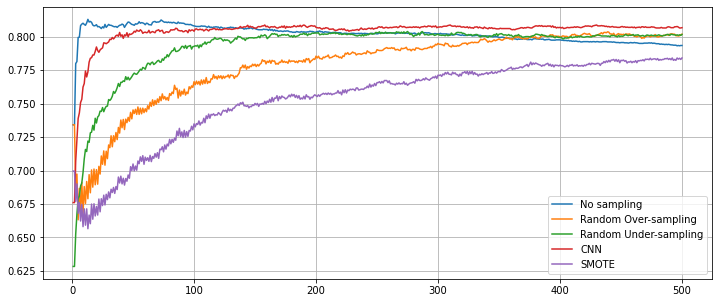

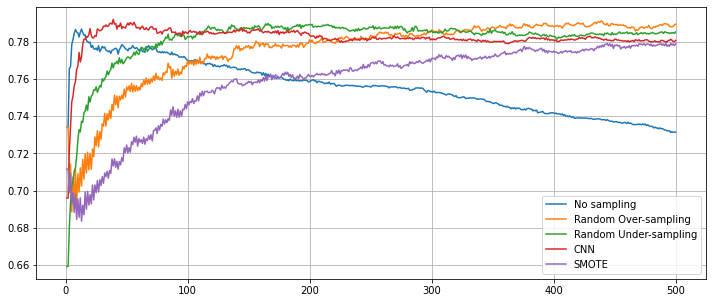

In [63]:
#accuracy

x = np.arange(1,len(predictions_rus) + 1)

w = plt.figure(figsize=(12,5))
plt.plot(x,normal[0],label='No sampling')
plt.plot(x,ros[0],label='Random Over-sampling')
plt.plot(x,rus[0],label='Random Under-sampling')
plt.plot(x,cnn[0],label='CNN')
plt.plot(x,smote[0],label='SMOTE')
plt.legend()
plt.grid(which='both')
plt.show()

q = plt.figure(figsize=(12,5))
plt.plot(x,normal[3],label='No sampling')
plt.plot(x,ros[3],label='Random Over-sampling')
plt.plot(x,rus[3],label='Random Under-sampling')
plt.plot(x,cnn[3],label='CNN')
plt.plot(x,smote[3],label='SMOTE')
plt.legend()
plt.grid(which='both')
plt.show()

In [64]:
rus = np.array(rus)
ros = np.array(ros)
cnn = np.array(cnn)
smote = np.array(smote)
normal = np.array(normal)

In [65]:
np.save('metrics_rus.npy',rus)
np.save('metrics_none.npy',normal)
np.save('metrics_ros.npy',ros)
np.save('metrics_cnn.npy',cnn)
np.save('metrics_smote.npy',smote)

In [66]:
methods = [ros,rus,cnn,normal,smote]

accuracy_vals = []
f1_index = []
f1_vals = []
for i in methods:
    
    index = np.argmax(i[3])
    
    f1_index.append(index)
    accuracy_vals.append(i[0][index])
    f1_vals.append(i[3][index])

In [67]:
results = pd.DataFrame(index = ["ROS","RUS","CNN","No Sampling", "SMOTE"])
results['Weighted F1 Index - K Value'] = f1_index

results['Accuracy Value'] = accuracy_vals

results['Weighted F1 Values'] = f1_vals

results

,Weighted F1 Index - K Value,Accuracy Value,Weighted F1 Values
ROS,438,0.803778,0.791339
RUS,165,0.802444,0.789922
CNN,38,0.803333,0.792142
No Sampling,12,0.813111,0.786926
SMOTE,491,0.784222,0.779354


In [68]:
results.to_csv('results_validation.csv')

In [69]:
test_rus = np.load('test_predictions_rus.npy')
test_ros = np.load('test_predictions_ros.npy')
test_smote = np.load('test_predictions_smote.npy')
test_non = np.load('test_predictions_none.npy')
test_cnn = np.load('test_predictions_cnn.npy')

In [71]:
ros = metrics(test_rus)
rus = metrics(test_ros)
cnn = metrics(test_cnn)
smote = metrics(test_smote)
normal = metrics(test_non)

In [81]:
ros_test = [ros[0][438], ros[3][438]]
rus_test = [rus[0][165], rus[3][165]]
cnn_test = [cnn[0][38], cnn[3][38]]
smote_test = [smote[0][491], smote[3][491]]
normal_test = [normal[0][12], normal[3][12]]
    
lot = [ros_test,rus_test,cnn_test,normal_test,smote_test]

In [82]:
test_f1 = []
test_acc = []
for i in lot:
    test_acc.append(i[0])
    test_f1.append(i[1])

In [83]:
results['Test Accuracy'] = test_acc
results['Test Weighted F1'] = test_f1

In [84]:
results

,Weighted F1 Index - K Value,Accuracy Value,Weighted F1 Values,Test Accuracy,Test Weighted F1
ROS,438,0.803778,0.791339,0.805556,0.790310
RUS,165,0.802444,0.789922,0.779556,0.780870
CNN,38,0.803333,0.792142,0.805111,0.796208
No Sampling,12,0.813111,0.786926,0.813778,0.790700
SMOTE,491,0.784222,0.779354,0.784667,0.782191


In [85]:
results.to_csv('results.csv')